<a href="https://colab.research.google.com/github/devkegovind/Data-Analytics-Laboratory/blob/main/Linear_Regression_on_3D_Printing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>TO PERFORM LINEAR REGRESSION STUDY ON THE 3D PRINTING DATASET</b></h1>

<h4 align='justify'><b>Aim: To Perform Linear Regression study on the 3D printing dataset.</b></h4>
<h4 align='justify'><b>Prerequisites</b>: Automobile data, Jupyter Notebook / Google Colab</h4>
<h4 align='justify'>This dataset comes from research by TR/Selcuk University Mechanical Engineering department.The aim of the study is to determine how much of the adjustment parameters in 3d printers affect the print quality, accuracy and strenght. Where there are nine setting parameters and three measured output parameters.</h4>

<h4 align='justify'><b>Content</b></h4>

<h4 align='justify'>Setting Parameters:</h4>

- Layer Height (mm)
- Wall Thickness (mm)
- Infill Density (%)
- Infill Pattern ()
- Nozzle Temperature (Cº)
- Bed Temperature (Cº)
- Print Speed (mm/s)
- Material ()
- Fan Speed (%)

<h4 align='justify'><b>Output Parameters: (Measured)</b></h4>

- Roughness (µm)
- Tension (ultimate) Strenght (MPa)
- Elongation (%)

<h4 align='justify'>In this notebook, we will perform simple linear regression analysis of the 3D printing 
dataset and study the various relationships existing between the target variables AKA 
labels and the predictor varibale AKA features.</h4>

- The dataset contains 12 columns.
- The first 9 columns i.e from layer_height to fan_speed are features.
- The last 3 columns i.i from roughness to elongation are labels. So, we will 
be predicting these three based on the 9 features.
- The various units of the nine features are as follows:

1. Layer Height in mm
2. Wall Thickness in mm
3. Infill Density in %
4. Infill Pattern in either Grid or Honeycomb
5. Nozzle Temperature in Degree C
6. Bed Temperature in degree C
7. Print speed in mm/s
8. Material in either abs or pla
9. Fan Speed in %

<h4 align='justify'>The units of the labels are as follows</h4>

1. Roughness in micro metre
2. Tension Strength in MPa
3. Elongation in %

<h4 align='justify'>Pictures of Infill patterns and Filament materials Basic information</h4>

- The dataset contains 50 rows of data.
- The columns infill_pattern and material consists of categorical entries (infill_pattern 
= grid or honeycomb and material = abs or pla) instead of numerical entries.
- In the Machine Learning World this is relatively a very small dataset interms of 
observations. Still we can fit a good regression model out of it and study them

<h4><b>Import Library</b></h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To enable matplot visualization
%matplotlib inline 

<h4><b>Import Dataset</b></h4>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/DAL/data.xlsx')

In [6]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [7]:
df.shape

(50, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [9]:
df.isna().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,50.0,0.106,0.064397,0.02,0.06,0.10,0.150,0.2
wall_thickness,50.0,5.220,2.922747,1.00,3.00,5.00,7.000,10.0
infill_density,50.0,53.400,25.363480,10.00,40.00,50.00,80.000,90.0
nozzle_temperature,50.0,221.500,14.820353,200.00,210.00,220.00,230.000,250.0
bed_temperature,50.0,70.000,7.142857,60.00,65.00,70.00,75.000,80.0
print_speed,50.0,64.000,29.692300,40.00,40.00,60.00,60.000,120.0
fan_speed,50.0,50.000,35.714286,0.00,25.00,50.00,75.000,100.0
roughness,50.0,170.580,99.034129,21.00,92.00,165.50,239.250,368.0
tension_strenght,50.0,20.080,8.925634,4.00,12.00,19.00,27.000,37.0
elongation,50.0,1.672,0.788188,0.40,1.10,1.55,2.175,3.3


In [20]:
col = df.select_dtypes(exclude='object').columns

In [21]:
col

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

<h4><b>Univariate Analysis</b></h4>

<Figure size 1080x720 with 0 Axes>

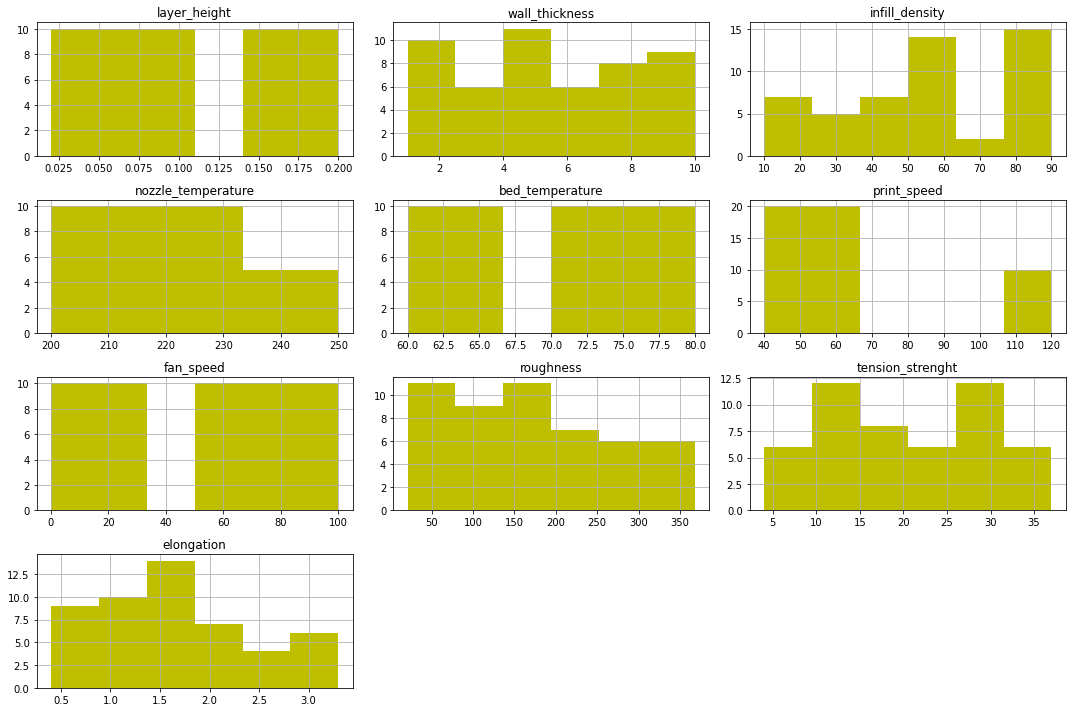

In [28]:
plt.figure(figsize=(15, 10))
df[col].hist(figsize=(15,10),bins=6,color='Y')
plt.tight_layout()
plt.show()

<h4><b>Findings</b></h4>

- Most of the AKA has layer_weight is in range 0.025 to 0.2
- Most of the AKA has wall_thickness is in range 1 to 5
- Most of the AKA has infill_density is in range 50 to 90
- Most of the AKA has nozzle_temperature is in range 200 to 230
- Most of the AKA has bed_temperature is in range 70 to 80
- Most of the AKA has print_speed is in range 40 to 65
- Most of the AKA has fan_speed is in range 50 to 100
- Most of the AKA has roughness is in range 25 to 250
- Most of the AKA has tension_strength is in range 10 to 20
- Most of the AKA has elongation is in range 0.4 to 1.8



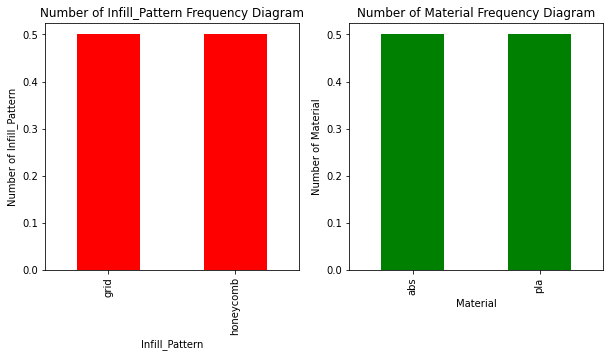

In [32]:
plt.figure(1)
plt.subplot(221)
df['infill_pattern'].value_counts(normalize=True).plot(figsize=(10,10), kind='bar', color='red')
plt.title("Number of Infill_Pattern Frequency Diagram")
plt.xlabel("Infill_Pattern")
plt.ylabel("Number of Infill_Pattern")


plt.subplot(222)
df['material'].value_counts(normalize=True).plot(figsize=(10,10), kind='bar', color='green')
plt.title("Number of Material Frequency Diagram")
plt.xlabel("Material")
plt.ylabel("Number of Material")
plt.show()

<h4><b>Findings</b></h4>

- Infill_Pattern have 50% of grid as well as honeycomb pattern.
- Material have 50% of abs as well as pla.

<h4><b>Bivariate Analysis</b></h4>

- Roughness in micro metre

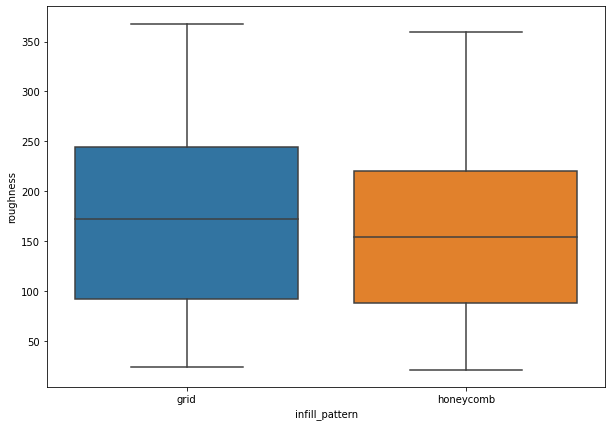

In [35]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.boxplot(x = 'infill_pattern', y='roughness', data = df)

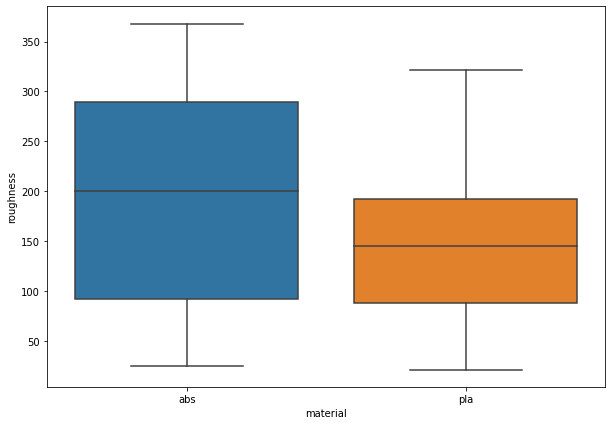

In [36]:
plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.boxplot(x = 'material', y='roughness', data = df)

(0.0, 385.35)

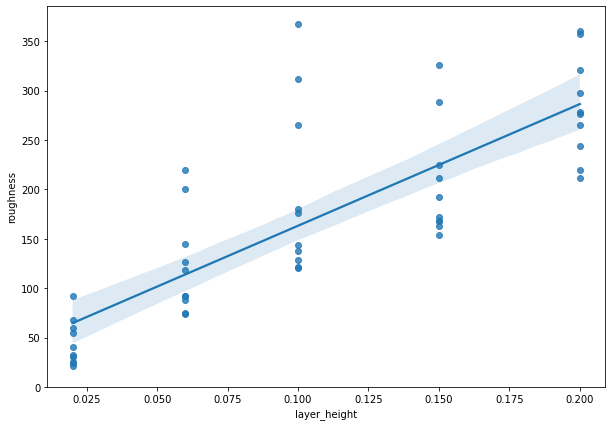

In [38]:
sns.regplot(x='layer_height', y='roughness', data = df)
plt.ylim(0,)

In [39]:
df[['layer_height', 'roughness']].corr()

,layer_height,roughness
layer_height,1.000000,0.801341
roughness,0.801341,1.000000


(0.0, 385.35)

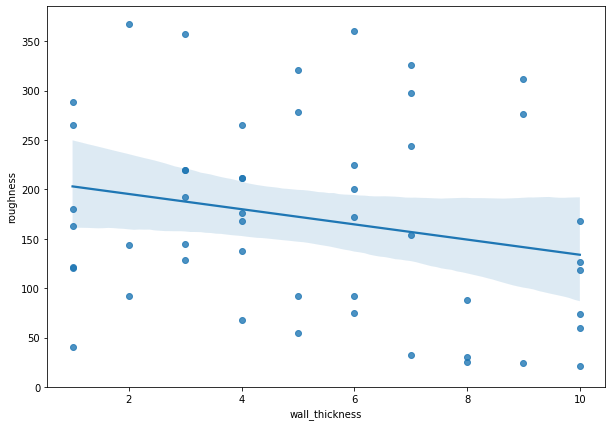

In [40]:
sns.regplot(x='wall_thickness', y='roughness', data = df)
plt.ylim(0,)

In [42]:
df[['wall_thickness', 'roughness']].corr()

,wall_thickness,roughness
wall_thickness,1.000000,-0.226987
roughness,-0.226987,1.000000


(0.0, 385.35)

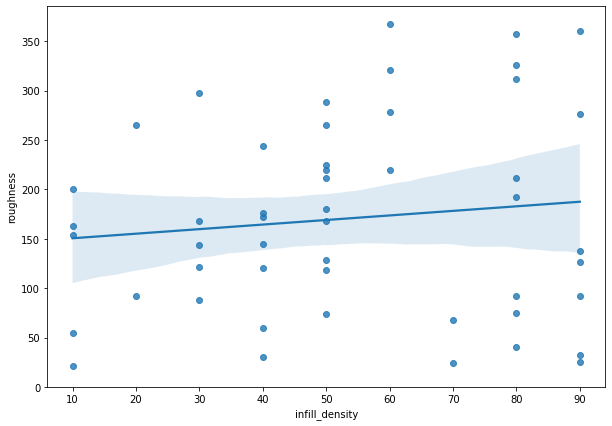

In [43]:
sns.regplot(x='infill_density', y='roughness', data = df)
plt.ylim(0,)

In [44]:
df[['infill_density', 'roughness']].corr()

,infill_density,roughness
infill_density,1.000000,0.118389
roughness,0.118389,1.000000


In [45]:
col

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

(0.0, 385.35)

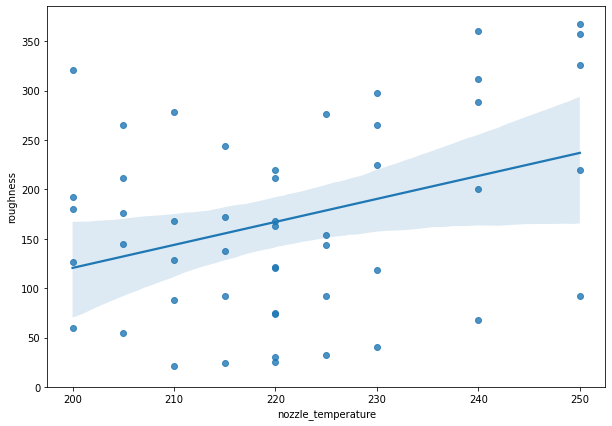

In [46]:
sns.regplot(x='nozzle_temperature', y='roughness', data = df)
plt.ylim(0,)

In [47]:
df[['nozzle_temperature', 'roughness']].corr()

,nozzle_temperature,roughness
nozzle_temperature,1.000000,0.348611
roughness,0.348611,1.000000


(0.0, 385.35)

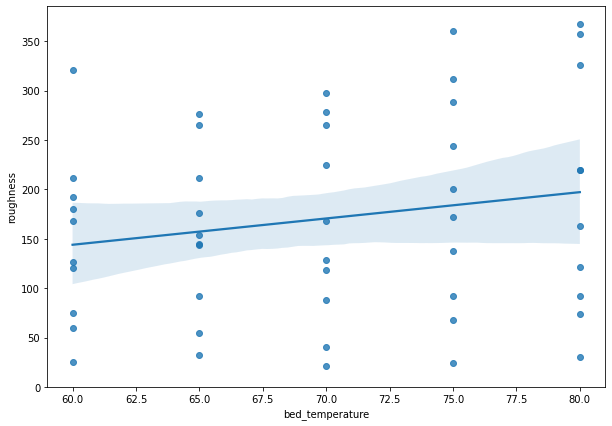

In [48]:
sns.regplot(x='bed_temperature', y='roughness', data = df)
plt.ylim(0,)

In [49]:
df[['bed_temperature', 'roughness']].corr()

,bed_temperature,roughness
bed_temperature,1.000000,0.192142
roughness,0.192142,1.000000


(0.0, 385.35)

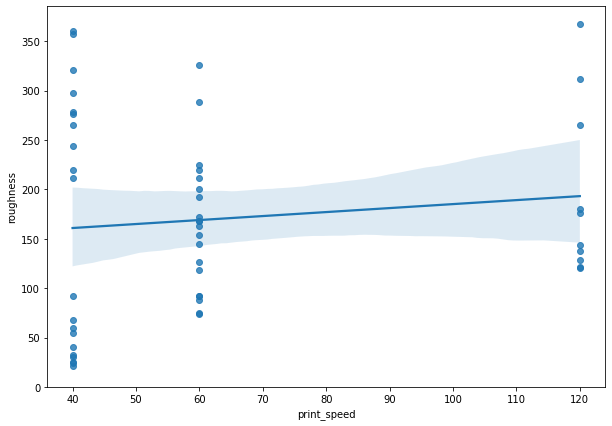

In [50]:
sns.regplot(x='print_speed', y='roughness', data = df)
plt.ylim(0,)

In [51]:
df[['print_speed', 'roughness']].corr()

,print_speed,roughness
print_speed,1.000000,0.121066
roughness,0.121066,1.000000


(0.0, 385.35)

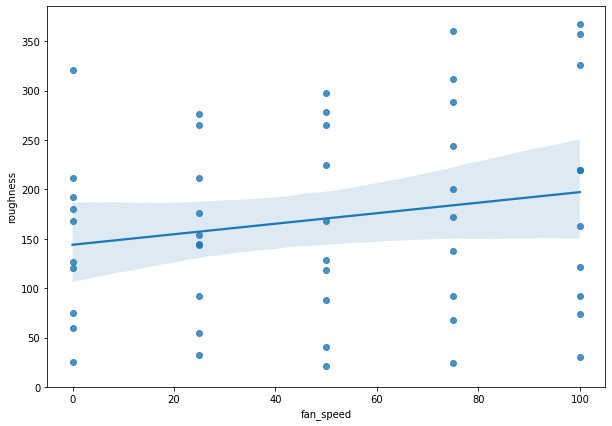

In [52]:
sns.regplot(x='fan_speed', y='roughness', data = df)
plt.ylim(0,)

In [53]:
df[['fan_speed', 'roughness']].corr()

,fan_speed,roughness
fan_speed,1.000000,0.192142
roughness,0.192142,1.000000


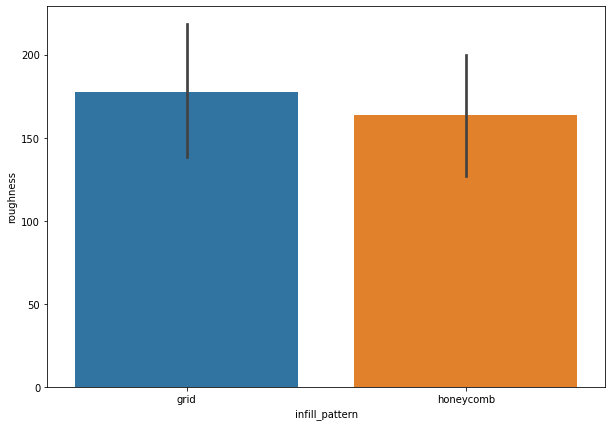

In [58]:
sns.barplot(x='infill_pattern', y = 'roughness', data = df)

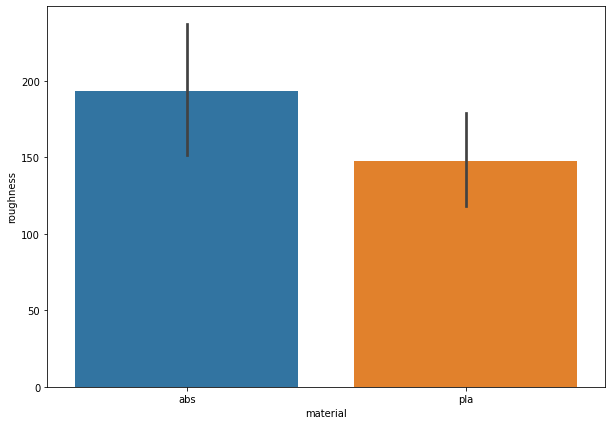

In [59]:
sns.barplot(x='material', y = 'roughness', data = df)

<h4><b>Replace Object into Numbers</b></h4> 

In [60]:
df['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1], inplace = True)
df['material'].replace(['abs', 'pla'], [0, 1], inplace = True)

In [61]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


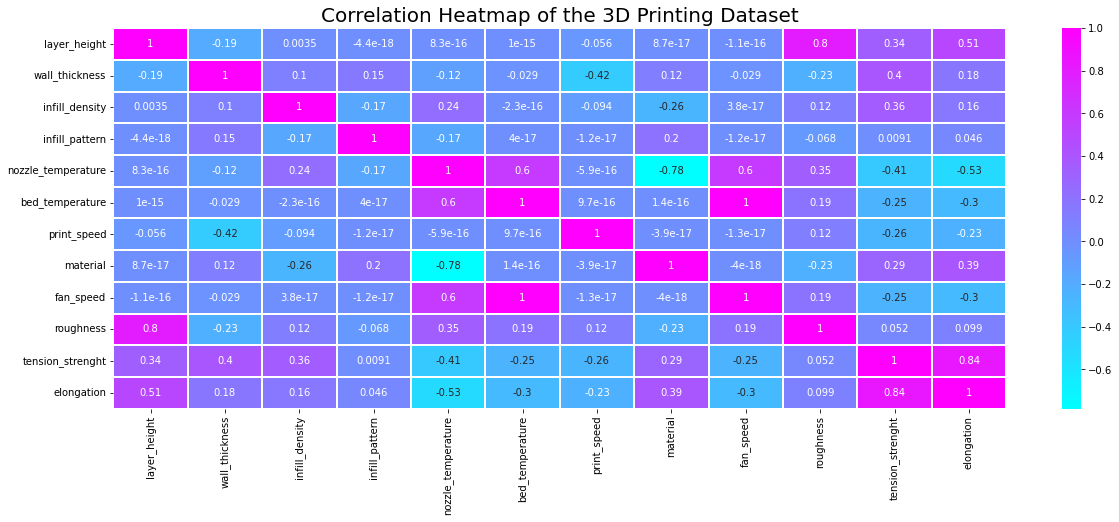

In [62]:
fig, ax = plt.subplots(figsize = (20, 7))
title = "Correlation Heatmap of the 3D Printing Dataset"
plt.title(title, fontsize = 20)
ttl = ax.title
sns.heatmap(df.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)
plt.show()

<h4><b>Defining Features and Labels</b></h4> 

In [63]:
X = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = df['roughness']

In [64]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [65]:
y.head()

0    25
1    32
2    40
3    68
4    92
Name: roughness, dtype: int64

<h4><b>Importing statsmodels libraty</b></h4> 

In [66]:
import statsmodels.api as sm

In [69]:
def linear_Regression(x, y):
  x = sm.add_constant(x)
  # defining the model, fitting the model and printing the result
  multiple_model = sm.OLS(y, x).fit()
  print(multiple_model.summary())

In [70]:
# calling the function
linear_Regression(X, y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.83e-16
Time:                        17:55:51   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9534      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
df[['infill_pattern', 'roughness']].corr()

,infill_pattern,roughness
infill_pattern,1.00000,-0.06834
roughness,-0.06834,1.00000


In [72]:
X = X.drop(['wall_thickness', 'infill_density', 'infill_pattern'], axis = 1)

In [73]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [74]:
X.shape

(50, 6)

In [75]:
linear_Regression(X, y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.67e-18
Time:                        18:00:36   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h4 align='justify'><b>Predicting Tension Strength based on Features</b></h4>

In [76]:
X1 = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y1 = df['tension_strenght']

In [78]:
X1.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [79]:
y1.head()

0    18
1    16
2     8
3    10
4     5
Name: tension_strenght, dtype: int64

In [80]:
linear_Regression(X1, y1)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.91e-08
Time:                        18:07:33   Log-Likelihood:                -151.94
No. Observations:                  50   AIC:                             321.9
Df Residuals:                      41   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0663      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
df[['infill_pattern', 'tension_strenght']].corr()

,infill_pattern,tension_strenght
infill_pattern,1.000000,0.009054
tension_strenght,0.009054,1.000000


In [82]:
df[['print_speed', 'tension_strenght']].corr()

,print_speed,tension_strenght
print_speed,1.00000,-0.26459
tension_strenght,-0.26459,1.00000


In [83]:
df[['material', 'tension_strenght']].corr()

,material,tension_strenght
material,1.000000,0.289726
tension_strenght,0.289726,1.000000


In [84]:
X1 = X1.drop(['infill_pattern', 'print_speed', 'material'], axis = 1)
X1.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed
0,0.02,8,90,220,60,0
1,0.02,7,90,225,65,25
2,0.02,1,80,230,70,50
3,0.02,4,70,240,75,75
4,0.02,6,90,250,80,100


In [85]:
linear_Regression(X1, y1)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.07e-08
Time:                        18:11:16   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h4 align='justify'><b>Predicting Elogation based on Features</b></h4>

In [86]:
X2 = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y2 = df['elongation']

In [87]:
X2.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [88]:
y2.head()

0    1.2
1    1.4
2    0.8
3    0.5
4    0.7
Name: elongation, dtype: float64

In [89]:
linear_Regression(X2, y2)

                            OLS Regression Results                            
Dep. Variable:             elongation   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     12.88
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.76e-09
Time:                        18:14:51   Log-Likelihood:                -27.126
No. Observations:                  50   AIC:                             72.25
Df Residuals:                      41   BIC:                             89.46
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0071      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
df[['infill_pattern', 'elongation']].corr()

,infill_pattern,elongation
infill_pattern,1.000000,0.046138
elongation,0.046138,1.000000


In [92]:
df[['print_speed', 'elongation']].corr()

,print_speed,elongation
print_speed,1.000000,-0.234052
elongation,-0.234052,1.000000


In [93]:
X2 = X2.drop(['infill_pattern','print_speed'], axis =1)

In [94]:
X2.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed
0,0.02,8,90,220,60,0,0
1,0.02,7,90,225,65,0,25
2,0.02,1,80,230,70,0,50
3,0.02,4,70,240,75,0,75
4,0.02,6,90,250,80,0,100


In [95]:
linear_Regression(X2, y2)

                            OLS Regression Results                            
Dep. Variable:             elongation   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     16.76
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.46e-10
Time:                        18:17:34   Log-Likelihood:                -28.403
No. Observations:                  50   AIC:                             70.81
Df Residuals:                      43   BIC:                             84.19
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0069      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
